# MULTIPLE LINEAR REGRESSION

### importing libraries

In [336]:
import pandas as pd
import matplotlib.pyplot as map
import numpy as np
import seaborn as sea
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import statsmodels.formula.api as smfa
from sklearn.linear_model import Lasso,Ridge

In [7]:
toyoto=pd.read_csv('ToyotaCorolla - MLR.csv')
toyoto

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


## Task-1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [10]:
toyoto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [12]:
toyoto.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [14]:
toyoto.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [20]:
#coverting categorical data into numerical data using get_dummies
toyoto1=pd.get_dummies(toyoto,dtype=int)
toyoto1

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,0,1
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,0,1
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,0,1
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,0,1


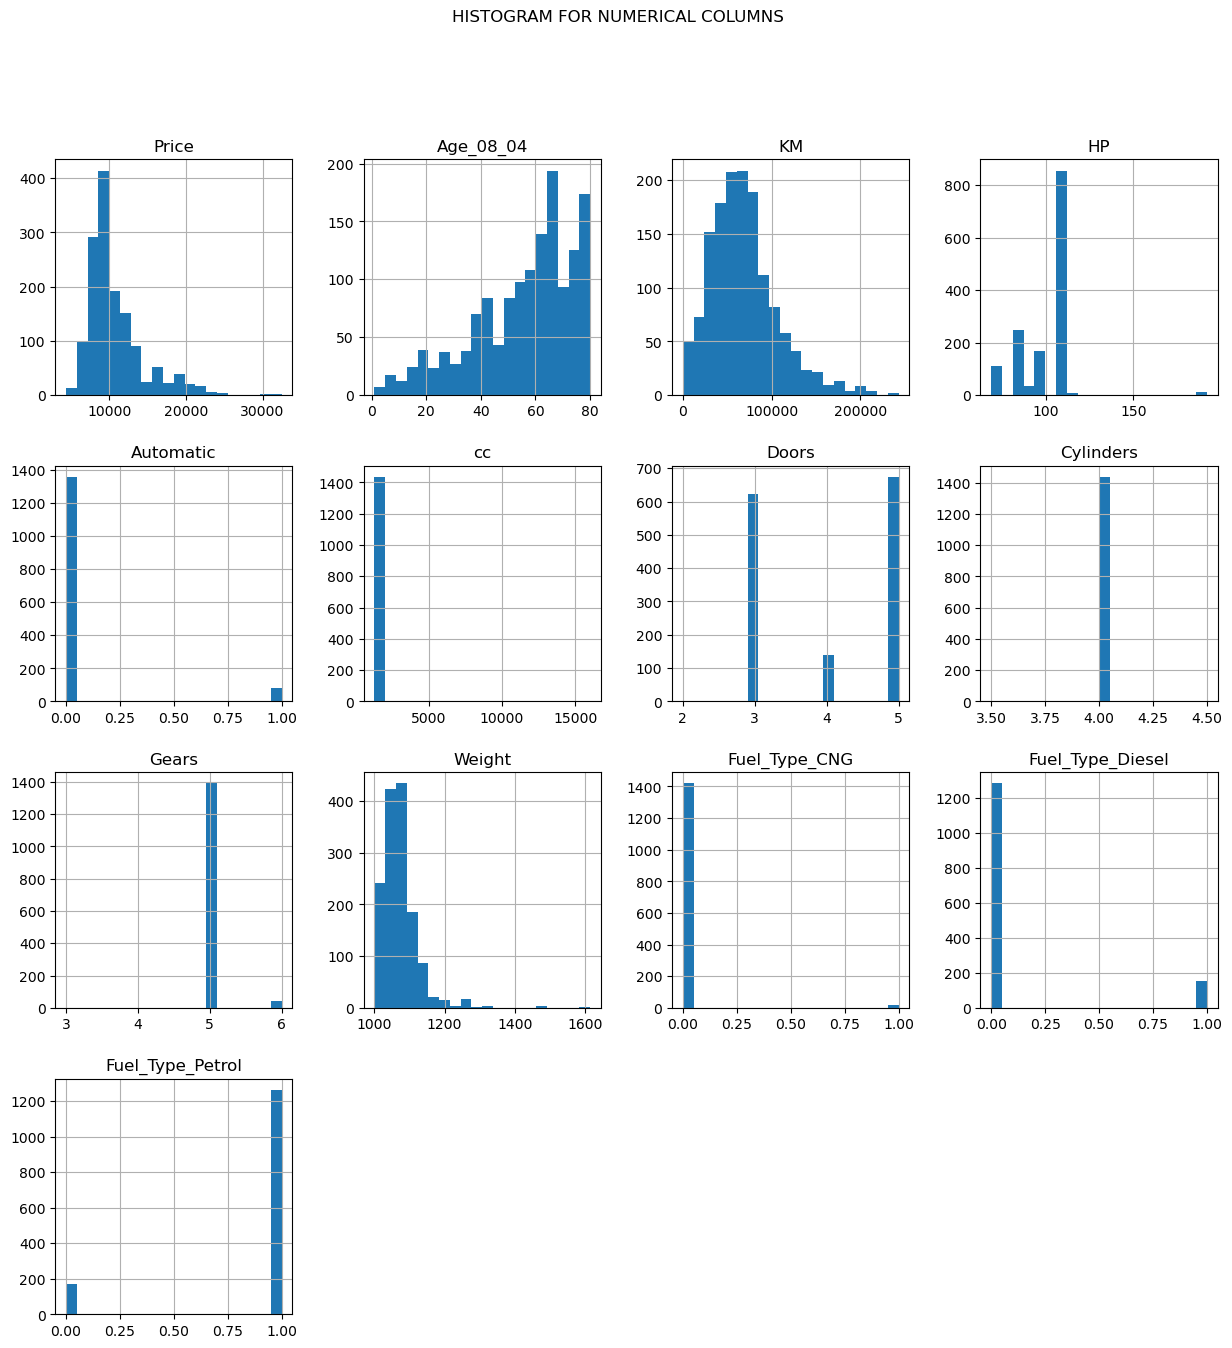

In [32]:
toyoto1.hist(bins=20,figsize=(15,15))
map.suptitle('HISTOGRAM FOR NUMERICAL COLUMNS')
map.show()

In [52]:
statistical_summary=pd.DataFrame({
    'MEAN':toyoto1.mean(),
    'MEDIAN':toyoto1.median(),
    'MODE':toyoto1.mode().iloc[0],
    'STANDARD DEVIATION':toyoto1.std()
    })
statistical_summary

,MEAN,MEDIAN,MODE,STANDARD DEVIATION
Price,10730.824513,9900.0,8950,3626.964585
Age_08_04,55.947075,61.0,68,18.599988
KM,68533.259749,63389.5,36000,37506.448872
HP,101.502089,110.0,110,14.981080
Automatic,0.055710,0.0,0,0.229441
cc,1576.855850,1600.0,1600,424.386770
Doors,4.033426,4.0,5,0.952677
Cylinders,4.000000,4.0,4,0.000000
Gears,5.026462,5.0,5,0.188510
Weight,1072.459610,1070.0,1075,52.641120


<Axes: >

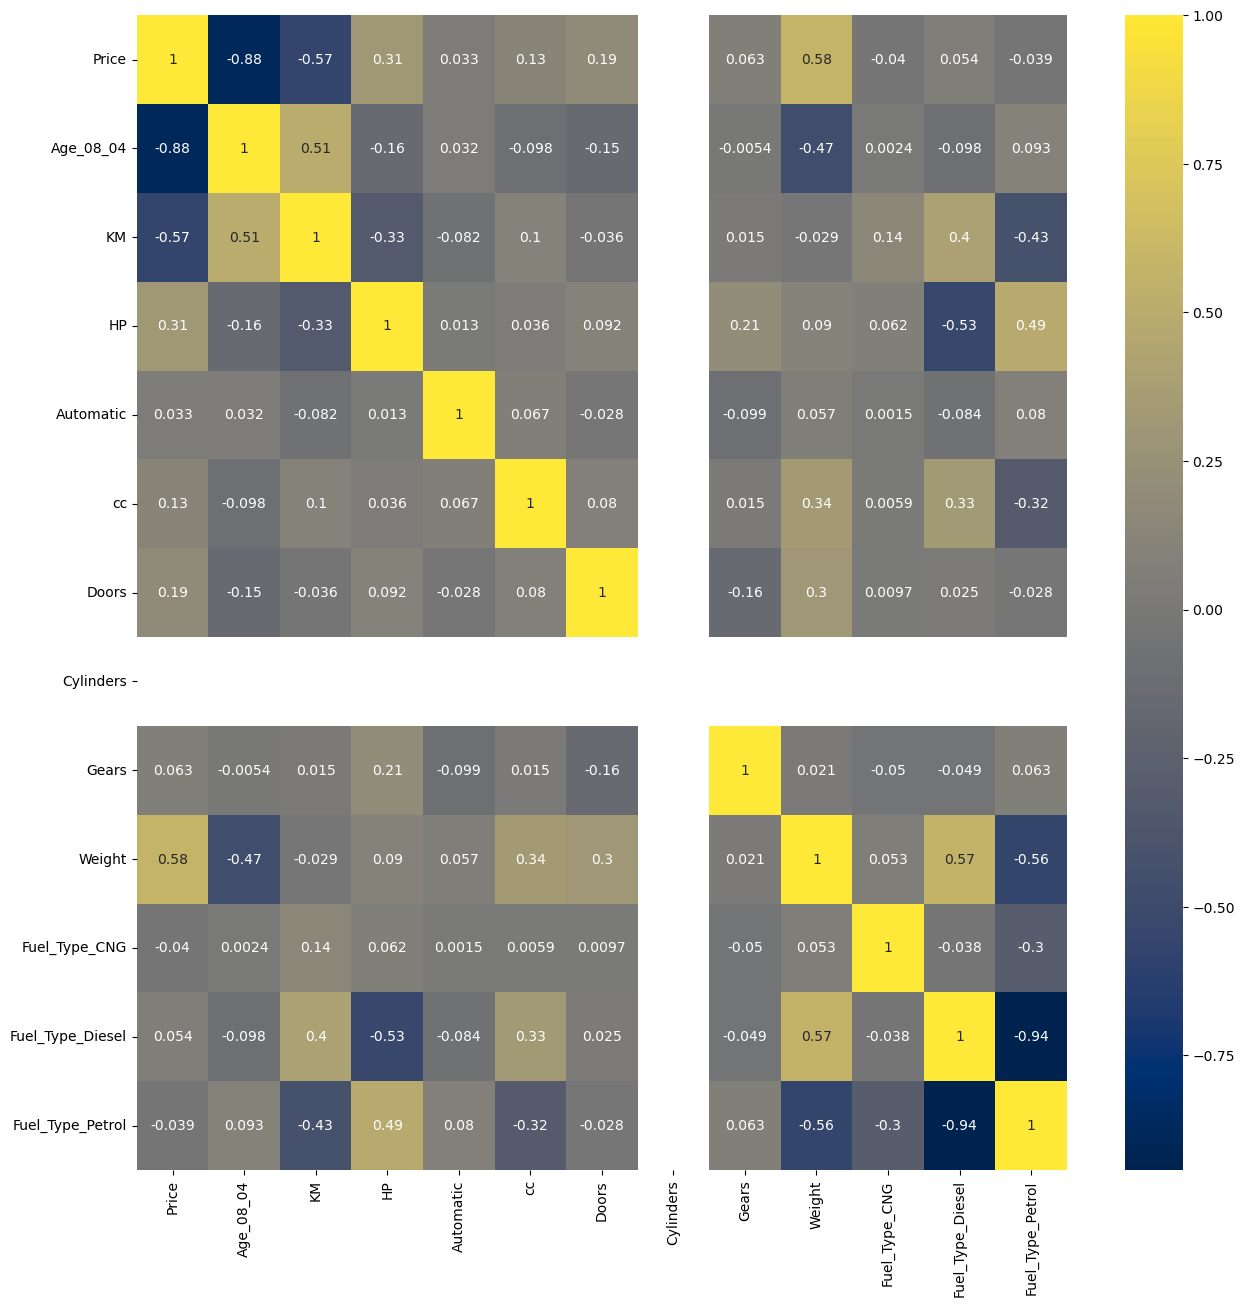

In [68]:
correlation=toyoto1.corr()
map.figure(figsize=(15,15))
sea.heatmap(correlation,annot=True,cmap='cividis')

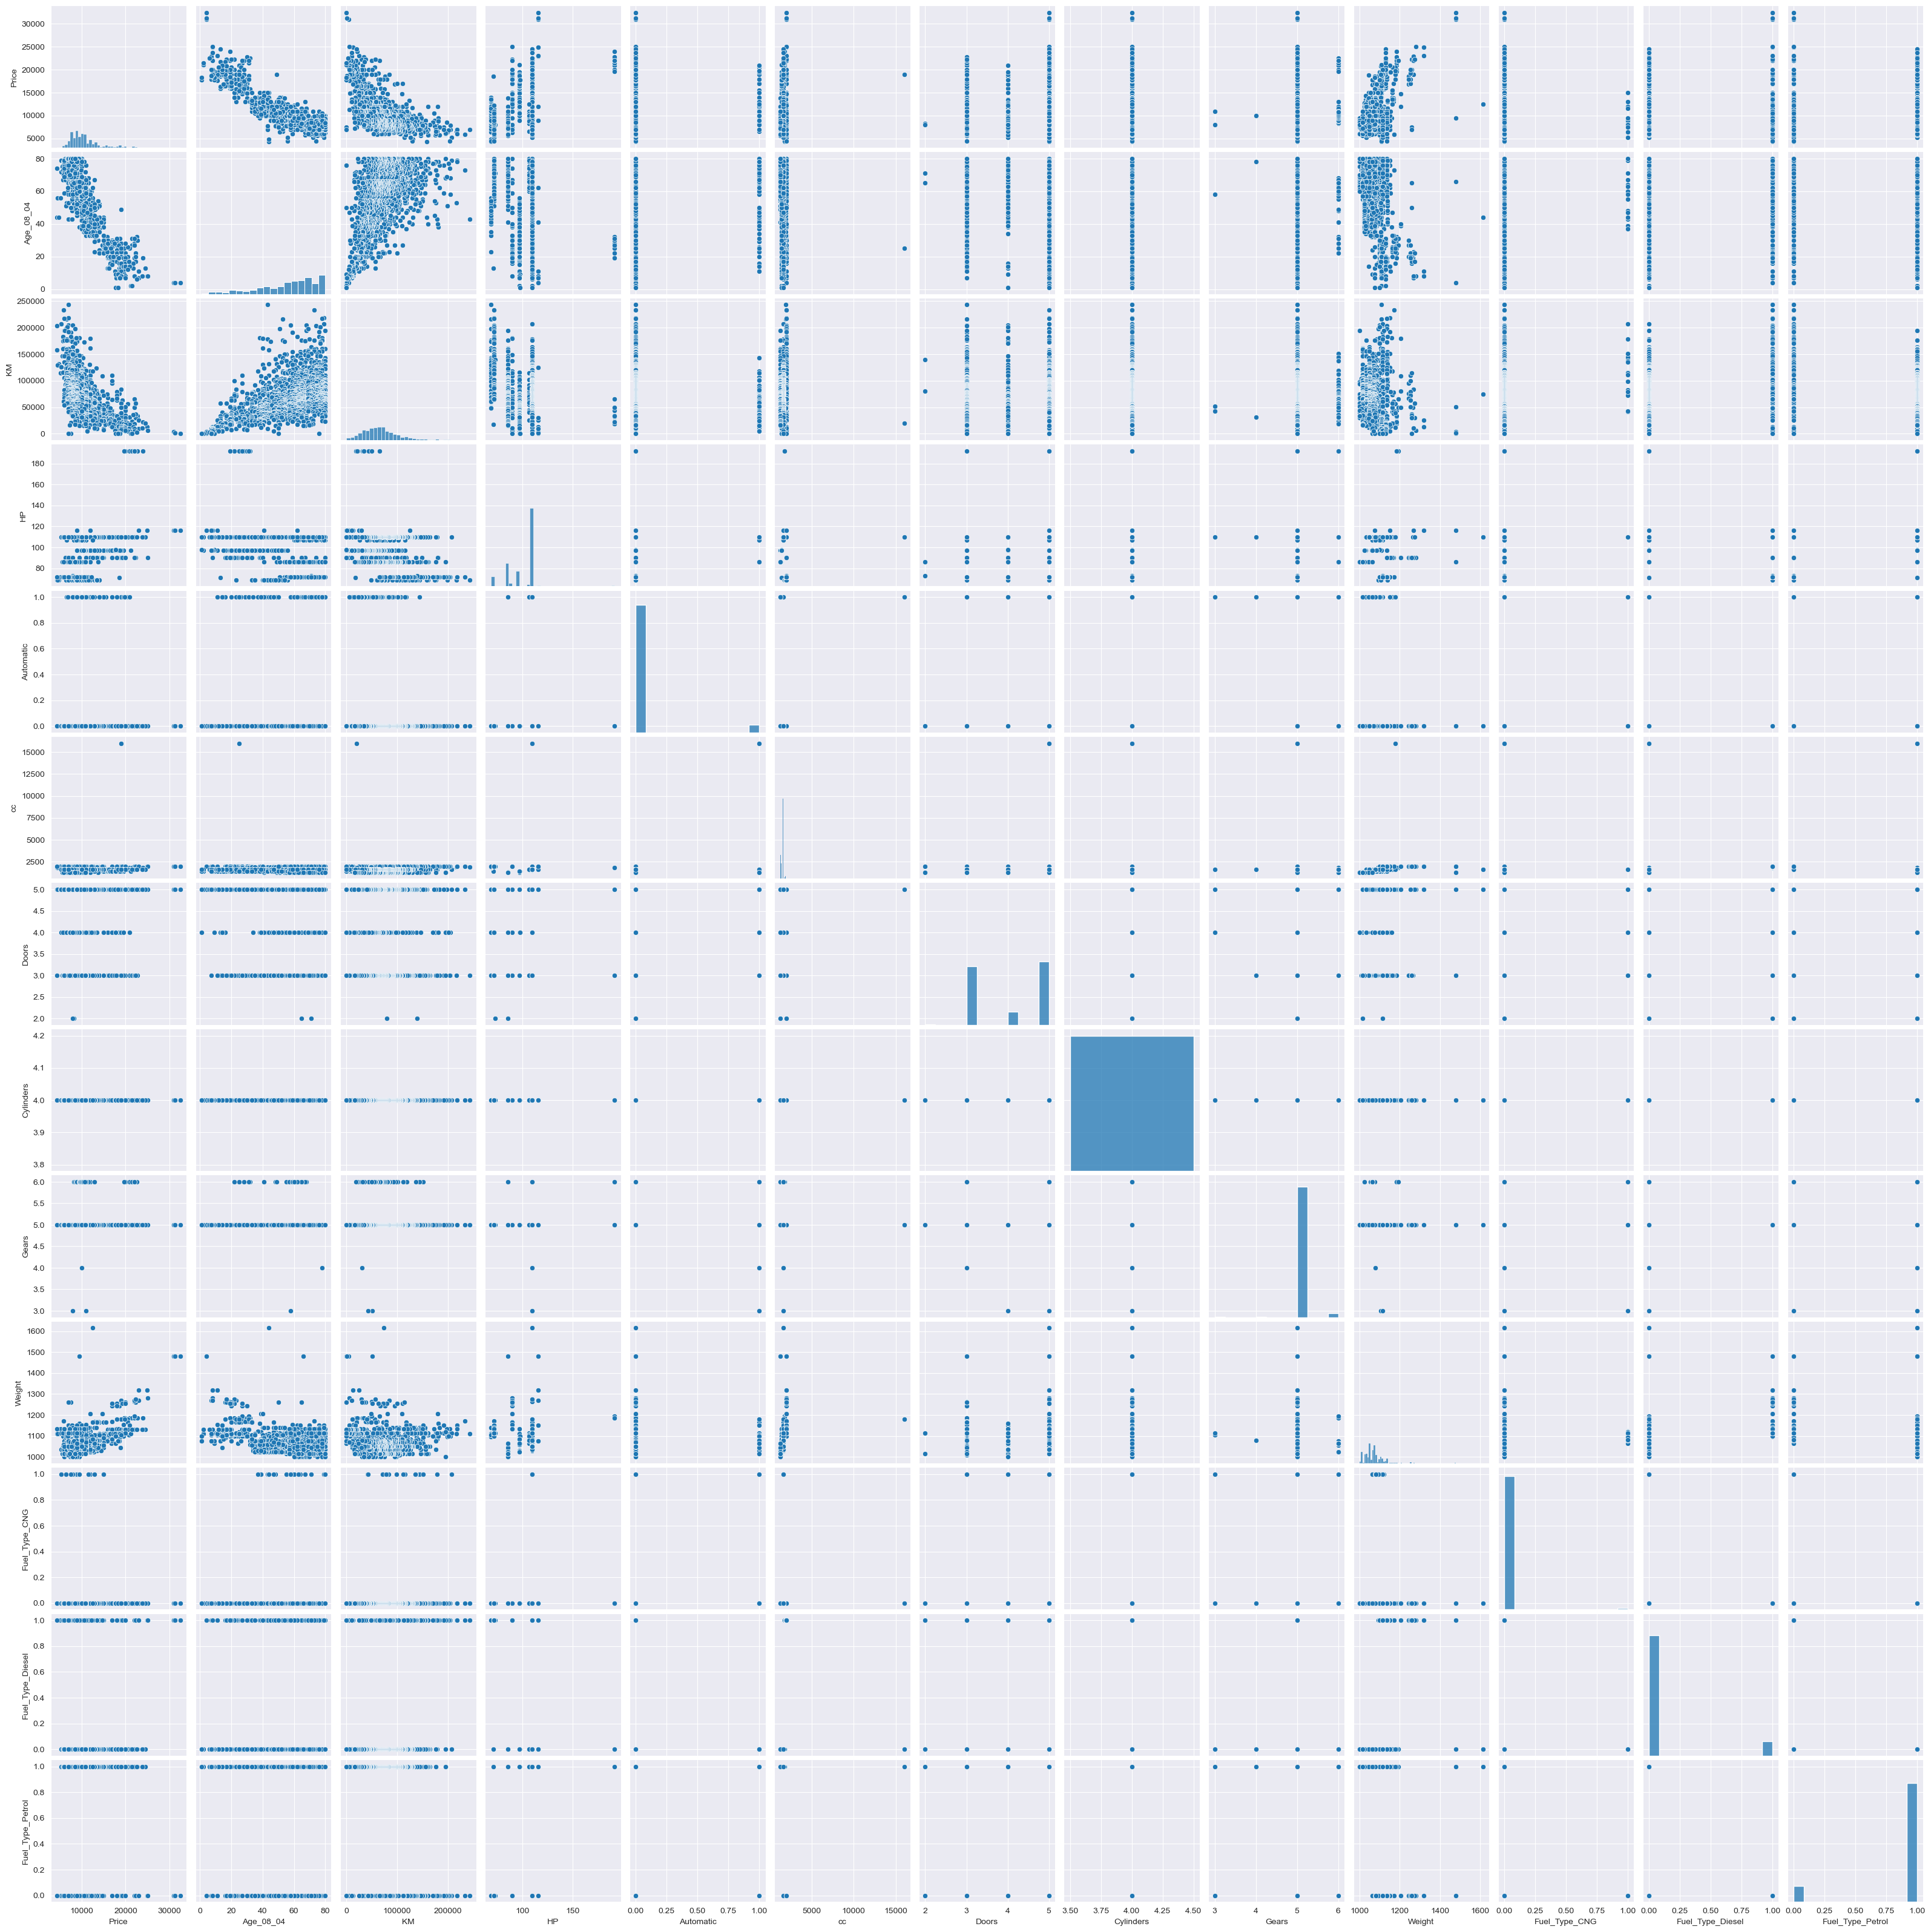

In [77]:
sea.set_style(style='darkgrid')
sea.pairplot(toyoto1)

## Task-2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [85]:
features=toyoto1.drop('Price',axis=1)
target=toyoto1['Price']

In [288]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=1)

In [93]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1148, 12)
(288, 12)
(1148,)
(288,)


## Task-3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

### MODEL-1
for entire data

In [141]:
model1=LinearRegression()
model1.fit(x_train,y_train)
print('intercept:',model1.intercept_,'\n','slope:',model1.coef_)

intercept: -3315.5615100975137 
 slope: [-1.23262175e+02 -1.66816186e-02  6.17622500e+01  4.59542671e+02
 -3.87926071e+00  9.49196820e+00 -5.68434189e-14  4.79782180e+02
  1.81442790e+01 -1.62143929e+03  1.90702338e+03 -2.85584088e+02]


In [195]:
y_pred=model1.predict(x_test)
model1_mse=mean_squared_error(y_test,y_pred)
model1_mae=mean_absolute_error(y_test,y_pred)
model1_r2_score=r2_score(y_test,y_pred)
model1_rmse=np.sqrt(model1_mse)

In [269]:
print('MEAN SQUARE ERROR:',model1_mse,'\n','R2 VALUES:',model1_r2_score,'\n','MEAN ABSOLUTE ERROR:',model1_mae,'\n','ROOT OF MEAN SQUARE ERROE:',model1_rmse)

MEAN SQUARE ERROR: 12831346.695309361 
 R2 VALUES: 0.08911535462520226 
 MEAN ABSOLUTE ERROR: 1143.6531244417918 
 ROOT OF MEAN SQUARE ERROE: 3582.086919005367


### MODEL-2 
for selected features

In [320]:
x=toyoto1.drop(['Price','HP','Doors','Gears','Cylinders','Fuel_Type_CNG','Automatic'], axis=1)
y=toyoto1['Price']

In [322]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [367]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1148, 6)
(288, 6)
(1148,)
(288,)


In [371]:
model2=LinearRegression()
model2.fit(x_train,y_train)
print('intercept:',model2.intercept_,'\n','slope:',model2.coef_)

intercept: -8062.311391996804 
 slope: [-1.24268092e+02 -1.78638797e-02  9.62858127e-01  2.24973460e+01
 -4.58168923e+02  1.54557220e+03]


In [328]:
y_pred1=model2.predict(x_test)
model2_mse=mean_squared_error(y_test,y_pred1)
model2_mae=mean_absolute_error(y_test,y_pred1)
model2_r2_score=r2_score(y_test,y_pred1)
model2_rmse=np.sqrt(model2_mse)

In [330]:
print('MEAN SQUARE ERROR:',model2_mse,'\n','R2 VALUES:',model2_r2_score,'\n','MEAN ABSOLUTE ERROR:',model2_mae,'\n','ROOT OF MEAN SQUARE ERROE:',model2_rmse)

MEAN SQUARE ERROR: 2219907.8592968103 
 R2 VALUES: 0.842410930731106 
 MEAN ABSOLUTE ERROR: 994.5778999745133 
 ROOT OF MEAN SQUARE ERROE: 1489.9355218588523


### MODEL-3
lasso regression for all columns

In [296]:
features1=toyoto1.drop('Price',axis=1)
target1=toyoto1['Price']

In [406]:
x_train,x_test,y_train,y_test=train_test_split(features1,target1,test_size=0.2,random_state=1)

In [408]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1148, 12)
(288, 12)
(1148,)
(288,)


In [410]:
lasso=Lasso(alpha=1)
lasso.fit(x_train,y_train)
print('intercept:',lasso.intercept_,'\n','slope:',lasso.coef_)

intercept: -3712.990182587777 
 slope: [-1.23264444e+02 -1.67032867e-02  6.00002534e+01  4.28089564e+02
 -3.71346075e+00  3.18726603e+00  0.00000000e+00  4.54184730e+02
  1.83341179e+01 -1.25918461e+03  2.04264167e+03 -0.00000000e+00]


In [452]:
lasso_pred=lasso.predict(x_test)
lasso_mse=mean_squared_error(y_test,lasso_pred)
lasso_mae=mean_absolute_error(y_test,lasso_pred)
lasso_r2_score=r2_score(y_test,lasso_pred)
lasso_rmse=np.sqrt(lasso_mse)

In [454]:
print('MEAN SQUARE ERROR:',lasso_mse,'\n','R2 VALUES:',lasso_r2_score,'\n','MEAN ABSOLUTE ERROR:',lasso_mae,'\n','ROOT OF MEAN SQUARE ERROE:',lasso_rmse)

MEAN SQUARE ERROR: 11906809.037270093 
 R2 VALUES: 0.1547473710281726 
 MEAN ABSOLUTE ERROR: 1134.9857010924545 
 ROOT OF MEAN SQUARE ERROE: 3450.6244416438735


## Task-4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [456]:
model_metrics=pd.DataFrame({
    'MEAN SQUARE ERROR':[model1_mse,model2_mse,lasso_mse],
    'R^2 VALUES':[model1_r2_score,model2_r2_score,lasso_r2_score],
    'MEAN ABBSOLUTE ERROR':[model1_mae,model2_mae,lasso_mae],
    'ROOT MEAN SQUARE ERROR':[model1_rmse,model2_rmse,lasso_rmse]
    }, index=['Model 1','Model 2','Model 3'])

In [458]:
model_metrics

,MEAN SQUARE ERROR,R^2 VALUES,MEAN ABBSOLUTE ERROR,ROOT MEAN SQUARE ERROR
Model 1,1.283135e+07,0.089115,1143.653124,3582.086919
Model 2,2.219908e+06,0.842411,994.577900,1489.935522
Model 3,1.190681e+07,0.154747,1134.985701,3450.624442


## Task-5.Apply Lasso and Ridge methods on the model.

### Lasso Regression

In [442]:
features2=toyoto1.drop('Price',axis=1)
target2=toyoto1['Price']

In [488]:
x_train,x_test,y_train,y_test=train_test_split(features2,target2,test_size=0.2,random_state=100)

In [490]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1148, 12)
(288, 12)
(1148,)
(288,)


In [492]:
lasso=Lasso(alpha=1)
lasso.fit(x_train,y_train)
print('intercept:',lasso.intercept_,'\n','slope:',lasso.coef_)

intercept: -11523.697675163881 
 slope: [-1.21100338e+02 -1.80621981e-02  2.33312809e+01  2.73268189e+02
 -5.33451738e-02 -3.23794796e+01  0.00000000e+00  5.99249034e+02
  2.27669899e+01 -7.64232075e+02 -0.00000000e+00  8.17614206e+02]


In [494]:
lasso_pred=lasso.predict(x_test)
lasso_mse=mean_squared_error(y_test,lasso_pred)
lasso_mae=mean_absolute_error(y_test,lasso_pred)
lasso_r2_score=r2_score(y_test,lasso_pred)
lasso_rmse=np.sqrt(lasso_mse)

In [496]:
print('MEAN SQUARE ERROR:',lasso_mse,'\n','R2 VALUES:',lasso_r2_score,'\n','MEAN ABSOLUTE ERROR:',lasso_mae,'\n','ROOT OF MEAN SQUARE ERROE:',lasso_rmse)

MEAN SQUARE ERROR: 1841545.5595637744 
 R2 VALUES: 0.8452889317790161 
 MEAN ABSOLUTE ERROR: 957.180644525498 
 ROOT OF MEAN SQUARE ERROE: 1357.0355778548233


### Ridge Regression

In [499]:
ridge=Ridge(alpha=1)
ridge.fit(x_train,y_train)
print('intercept:',ridge.intercept_,'\n','slope:',ridge.coef_)

intercept: -11573.285858617155 
 slope: [-1.21153381e+02 -1.80345339e-02  2.33380442e+01  2.90507388e+02
 -5.43065369e-02 -3.27906655e+01  0.00000000e+00  6.13601473e+02
  2.27565384e+01 -8.01766229e+02 -7.36087226e+00  8.09127101e+02]


In [501]:
ridge_pred=ridge.predict(x_test)
ridge_mse=mean_squared_error(y_test,ridge_pred)
ridge_mae=mean_absolute_error(y_test,ridge_pred)
ridge_r2_score=r2_score(y_test,ridge_pred)
ridge_rmse=np.sqrt(ridge_mse)

In [503]:
print('MEAN SQUARE ERROR:',ridge_mse,'\n','R2 VALUES:',ridge_r2_score,'\n','MEAN ABSOLUTE ERROR:',ridge_mae,'\n','ROOT OF MEAN SQUARE ERROE:',ridge_rmse)

MEAN SQUARE ERROR: 1843213.503263687 
 R2 VALUES: 0.8451488052694079 
 MEAN ABSOLUTE ERROR: 957.7074691689098 
 ROOT OF MEAN SQUARE ERROE: 1357.6499929155846


In [506]:
statistics=pd.DataFrame({
    'MEAN SQUARE ERROR':[lasso_mse,ridge_mse],
    'R^2 VALUE':[lasso_r2_score,ridge_r2_score],
    'MEAN ABSOLUTE ERROR':[lasso_mae,ridge_mae],
    'ROOT OF MEAN SQUARE ERROE':[lasso_rmse,ridge_rmse]
},index=['LASSO REGRESSION','RIDGE REGGRESION'])

In [508]:
statistics

,MEAN SQUARE ERROR,R^2 VALUE,MEAN ABSOLUTE ERROR,ROOT OF MEAN SQUARE ERROE
LASSO REGRESSION,1.841546e+06,0.845289,957.180645,1357.035578
RIDGE REGGRESION,1.843214e+06,0.845149,957.707469,1357.649993


## INTERVIEW QUESTIONS

### 1.What is Normalization & Standardization and how is it helpful?

Normalization scales the features to a range between 0 and 1, whereas standardization scales the features so that they have mean 0 and standard deviation.Both techniques help in improving the performance and convergence of machine learning algorithms, especially those based on gradient descent.

### 2.What techniques can be used to address multicollinearity in multiple linear regression?

(1)Remove one of the correlated variables.




(2)Combine the correlated variables into a single feature.




(3)Use dimensionality reduction techniques like Principal Component Analysis (PCA).




(4)Regularization techniques like Lasso and Ridge regression.
